In [24]:
#import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import joblib
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Dataset\Insurance_CS.csv")
df.head()

,Customer_ID,Age,Gender,Location,Income Level,Number of Active Policies,Total Premium Paid,Claim Frequency,Policy Upgrades,Occupation,Coverage Amount,Policy Type
0,CUST10000,49,Male,Rural,Low,1,13610.00,1,2,Self-Employed,537000.0,Life
1,CUST10001,28,Male,Urban,Medium,1,36205.58,1,0,Salaried,933000.0,Auto
2,CUST10002,41,Male,Suburban,Medium,3,3268.89,1,0,Self-Employed,467000.0,Life
3,CUST10003,20,Male,Suburban,Low,2,29083.67,0,0,Retired,142000.0,Auto
4,CUST10004,47,Male,Urban,Medium,1,34498.55,0,1,Salaried,693000.0,Health


In [3]:
df.rename(columns={
     "Customer_ID": "customer_id",
    "Age": "age",
    "Gender": "gender",
    "Location": "location",
    "Income Level": "income_level",
    "Number of Active Policies": "active_policies",
    "Total Premium Paid": "total_premium_paid",
    "Claim Frequency": "claim_frequency",
    "Policy Upgrades": "policy_upgrades",
    "Occupation": "occupation",
    "Coverage Amount": "coverage_amount",
    "Policy Type": "policy_type"
}, inplace=True)
df.head()

,customer_id,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type
0,CUST10000,49,Male,Rural,Low,1,13610.00,1,2,Self-Employed,537000.0,Life
1,CUST10001,28,Male,Urban,Medium,1,36205.58,1,0,Salaried,933000.0,Auto
2,CUST10002,41,Male,Suburban,Medium,3,3268.89,1,0,Self-Employed,467000.0,Life
3,CUST10003,20,Male,Suburban,Low,2,29083.67,0,0,Retired,142000.0,Auto
4,CUST10004,47,Male,Urban,Medium,1,34498.55,0,1,Salaried,693000.0,Health


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         50000 non-null  object 
 1   age                 50000 non-null  int64  
 2   gender              50000 non-null  object 
 3   location            50000 non-null  object 
 4   income_level        50000 non-null  object 
 5   active_policies     50000 non-null  int64  
 6   total_premium_paid  50000 non-null  float64
 7   claim_frequency     50000 non-null  int64  
 8   policy_upgrades     50000 non-null  int64  
 9   occupation          50000 non-null  object 
 10  coverage_amount     50000 non-null  float64
 11  policy_type         50000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [5]:
df.describe()

,age,active_policies,total_premium_paid,claim_frequency,policy_upgrades,coverage_amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,46.027280,2.004200,24995.702562,1.003400,0.904700,5.010380e+05
std,16.452333,1.417809,9908.330163,1.002621,0.790563,1.977852e+05
min,18.000000,0.000000,1000.000000,0.000000,0.000000,5.000000e+04
25%,32.000000,1.000000,18264.440000,0.000000,0.000000,3.650000e+05
50%,46.000000,2.000000,24955.085000,1.000000,1.000000,5.000000e+05
75%,60.000000,3.000000,31681.800000,2.000000,1.000000,6.360000e+05
max,74.000000,11.000000,66353.190000,7.000000,3.000000,1.274000e+06


In [6]:
df.isnull().sum()

customer_id           0
age                   0
gender                0
location              0
income_level          0
active_policies       0
total_premium_paid    0
claim_frequency       0
policy_upgrades       0
occupation            0
coverage_amount       0
policy_type           0
dtype: int64

In [7]:
#duplicates
duplicates=df[df.duplicated()]
duplicates

,customer_id,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type


In [8]:
udf=df.drop('customer_id',axis=1)
udf.head()

,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type
0,49,Male,Rural,Low,1,13610.00,1,2,Self-Employed,537000.0,Life
1,28,Male,Urban,Medium,1,36205.58,1,0,Salaried,933000.0,Auto
2,41,Male,Suburban,Medium,3,3268.89,1,0,Self-Employed,467000.0,Life
3,20,Male,Suburban,Low,2,29083.67,0,0,Retired,142000.0,Auto
4,47,Male,Urban,Medium,1,34498.55,0,1,Salaried,693000.0,Health


In [9]:
#EDA
numeric_df = udf.select_dtypes(include="number")
categorical_df = udf.select_dtypes(exclude="number")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


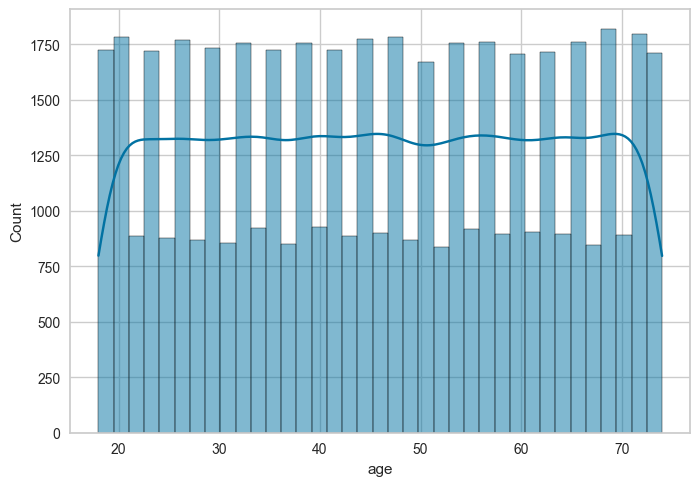

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


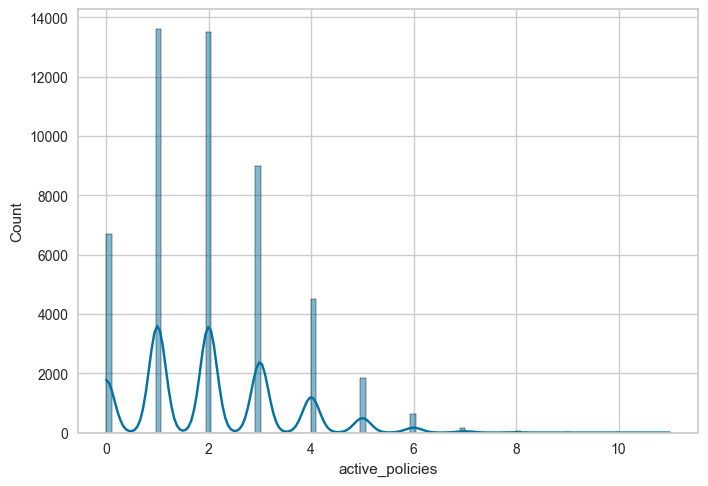

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


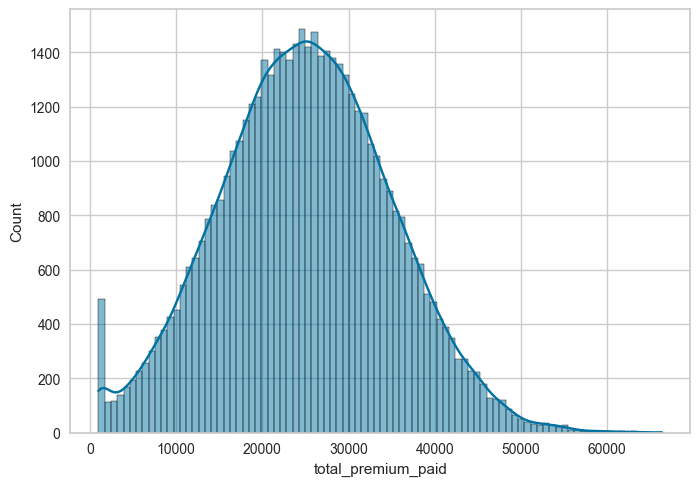

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


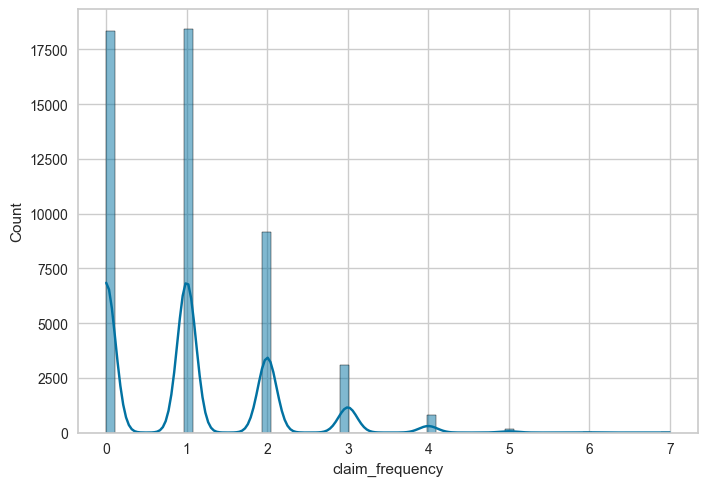

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


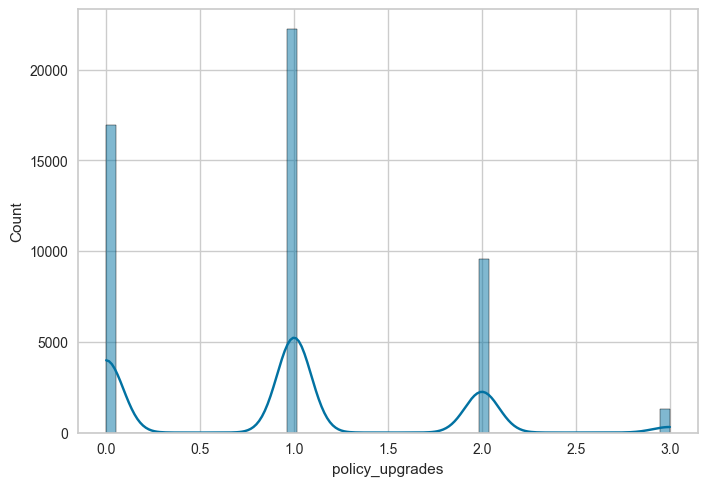

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


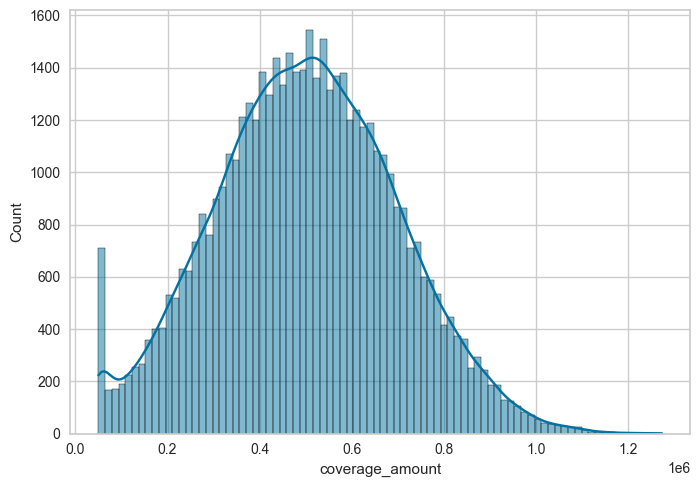

In [10]:
#univariate_numeric
numeric_col = numeric_df.columns 

for col in numeric_col: 
    sns.histplot(data=numeric_df,x=col,kde=True)
    plt.show()

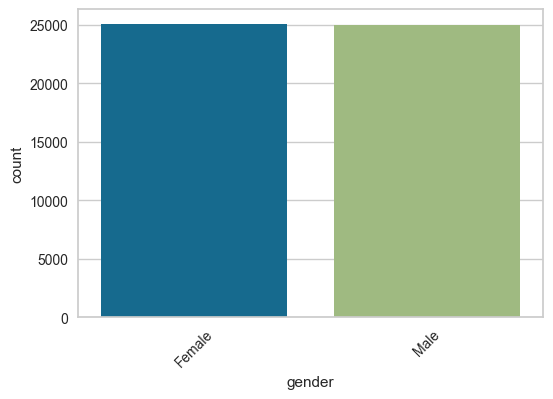

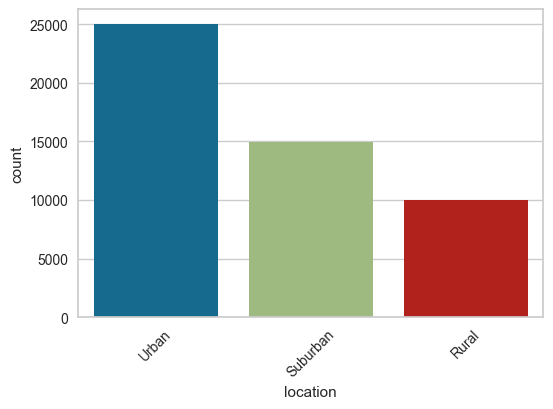

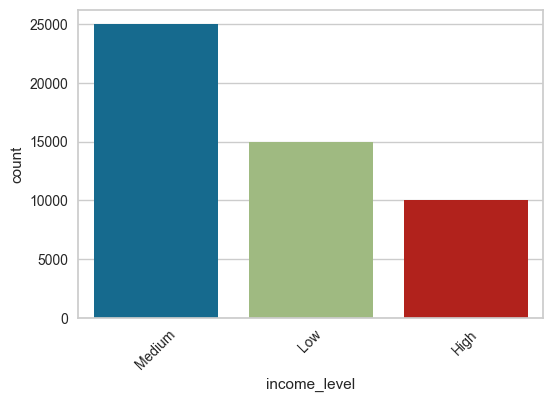

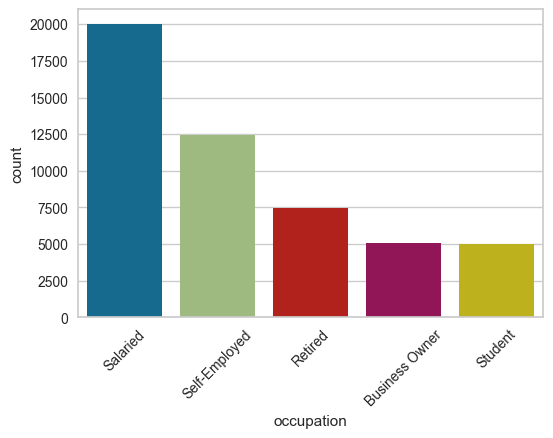

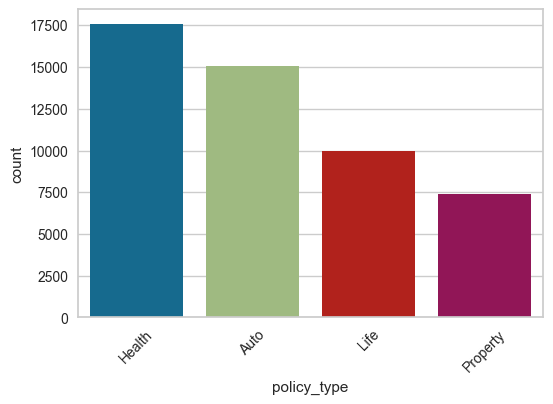

In [11]:
#univariate_categorical
categorical_col = categorical_df.columns 

for col in categorical_df: 
    plt.figure(figsize=(6, 4))
    sns.countplot(data=categorical_df, x=col, order=categorical_df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

<Axes: xlabel='gender', ylabel='count'>

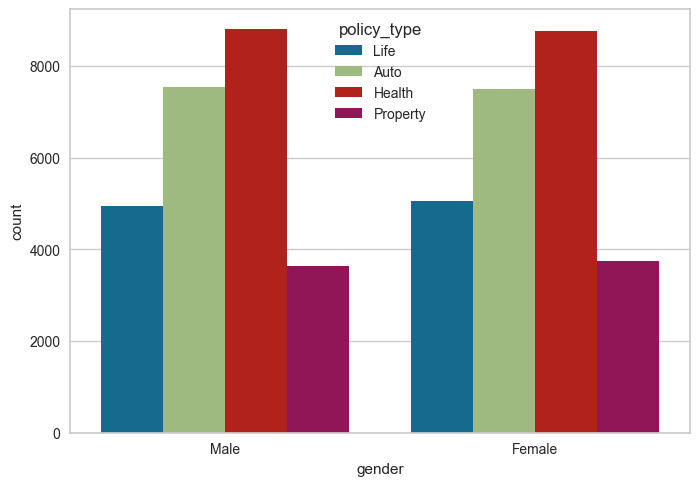

In [12]:
sns.countplot(x=df["gender"], hue=df["policy_type"])

<Axes: xlabel='count', ylabel='location'>

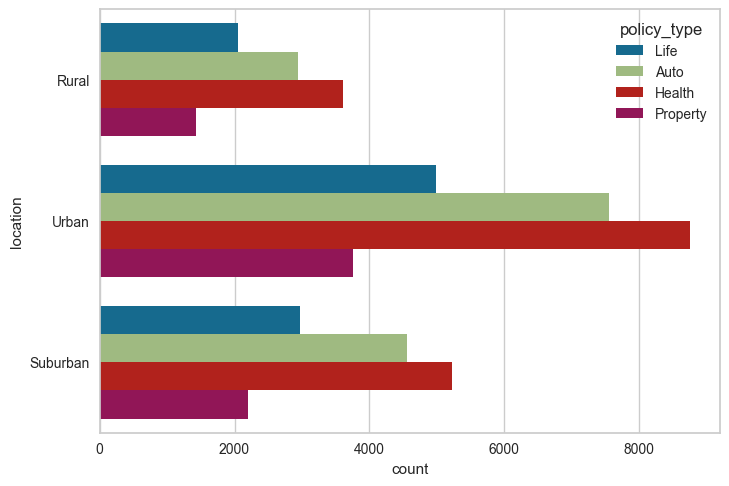

In [13]:
sns.countplot(data=df, y="location", hue="policy_type")

<Axes: xlabel='count', ylabel='occupation'>

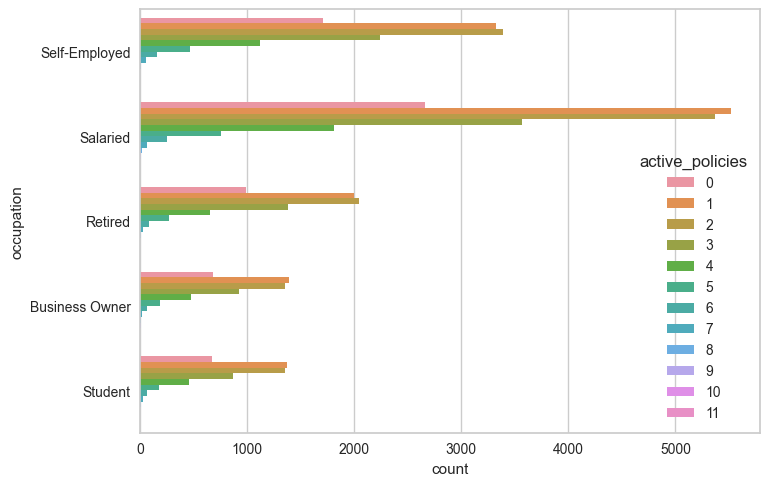

In [14]:
sns.countplot(data=df, y="occupation", hue="active_policies")

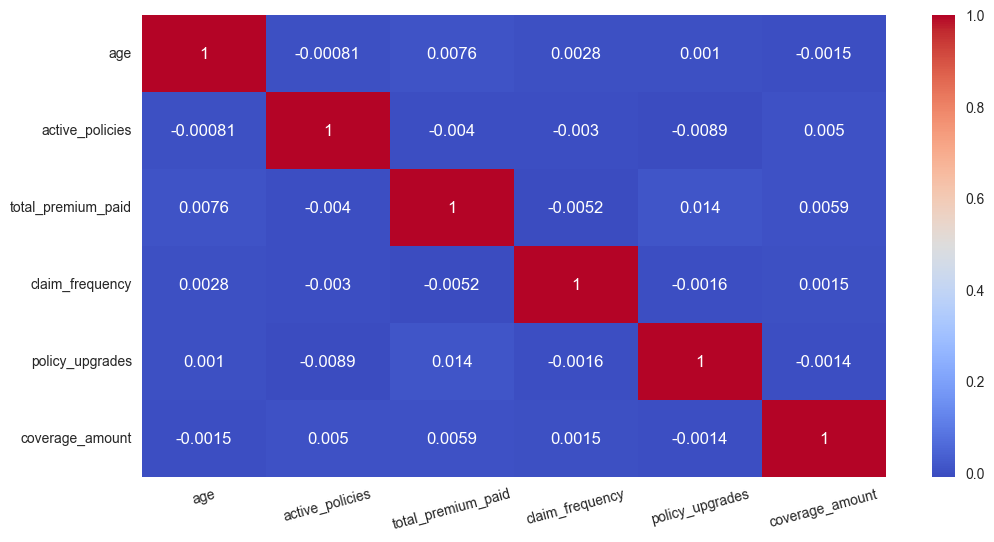

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True,cmap="coolwarm")
plt.xticks(rotation=15)
plt.show()

In [9]:
udf.head()

,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type
0,49,Male,Rural,Low,1,13610.00,1,2,Self-Employed,537000.0,Life
1,28,Male,Urban,Medium,1,36205.58,1,0,Salaried,933000.0,Auto
2,41,Male,Suburban,Medium,3,3268.89,1,0,Self-Employed,467000.0,Life
3,20,Male,Suburban,Low,2,29083.67,0,0,Retired,142000.0,Auto
4,47,Male,Urban,Medium,1,34498.55,0,1,Salaried,693000.0,Health


In [10]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 50000 non-null  int64  
 1   gender              50000 non-null  object 
 2   location            50000 non-null  object 
 3   income_level        50000 non-null  object 
 4   active_policies     50000 non-null  int64  
 5   total_premium_paid  50000 non-null  float64
 6   claim_frequency     50000 non-null  int64  
 7   policy_upgrades     50000 non-null  int64  
 8   occupation          50000 non-null  object 
 9   coverage_amount     50000 non-null  float64
 10  policy_type         50000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ MB


In [11]:
df_encoded = udf.copy()

# Columns to label encode
label_cols = ['gender', 'location', 'income_level', 'occupation', 'policy_type']

# Apply LabelEncoder
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Now df_label_encoded is fully numeric and clustering-ready
print(df_encoded.dtypes)
df_encoded.head()

age                     int64
gender                  int32
location                int32
income_level            int32
active_policies         int64
total_premium_paid    float64
claim_frequency         int64
policy_upgrades         int64
occupation              int32
coverage_amount       float64
policy_type             int32
dtype: object


,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type
0,49,1,0,1,1,13610.00,1,2,3,537000.0,2
1,28,1,2,2,1,36205.58,1,0,2,933000.0,0
2,41,1,1,2,3,3268.89,1,0,3,467000.0,2
3,20,1,1,1,2,29083.67,0,0,1,142000.0,0
4,47,1,2,2,1,34498.55,0,1,2,693000.0,1


In [12]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
x_scaled = scaler.fit_transform(df_encoded)

# If you want to see the shape or a few rows
pd.DataFrame(x_scaled, columns=df_encoded.columns).head()

,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type
0,0.180689,1.002924,-1.662918,-0.383053,-0.708283,-1.149116,-0.003391,1.385482,0.827059,0.181825,0.785337
1,-1.095739,1.002924,0.895221,0.896863,-0.708283,1.131370,-0.003391,-1.144385,-0.087809,2.184018,-1.163293
2,-0.305569,1.002924,-0.383849,0.896863,0.702358,-2.192804,-0.003391,-1.144385,0.827059,-0.172098,0.785337
3,-1.581997,1.002924,-0.383849,-0.383053,-0.002962,0.412583,-1.000787,-1.144385,-1.002677,-1.815311,-1.163293
4,0.059124,1.002924,0.895221,0.896863,-0.708283,0.959086,-1.000787,0.120548,-0.087809,0.970568,-0.188978


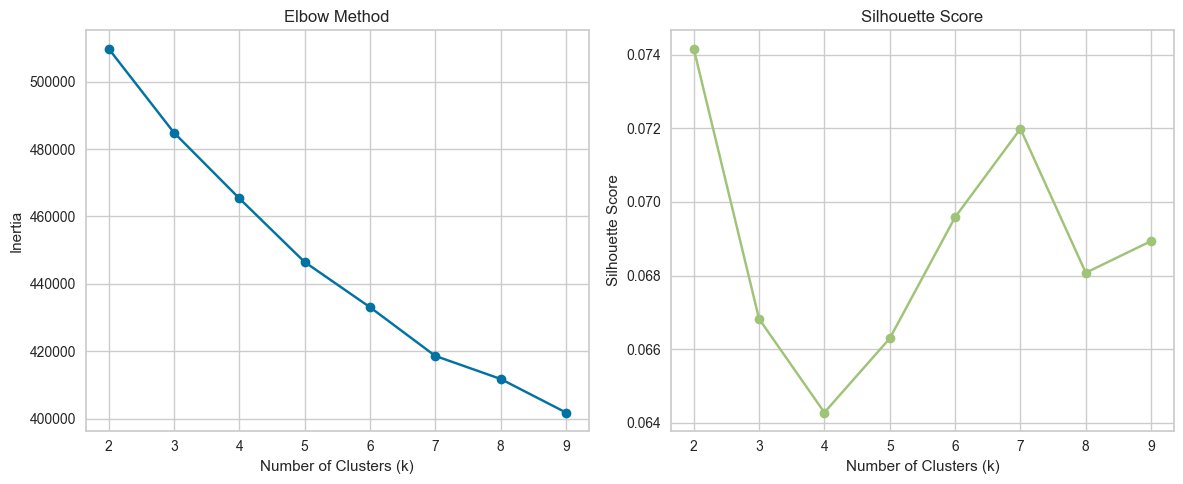

In [13]:
inertias = []
sil_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(x_scaled, kmeans.labels_))

# Plot both metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, 'go-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")

plt.tight_layout()
plt.show()


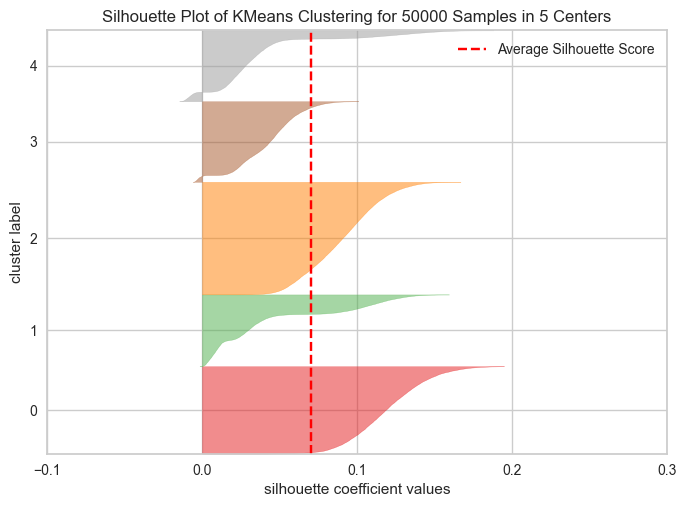

In [14]:
#KMEANS
km = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(x_scaled)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(x_scaled)
visualizer.show()
plt.show()

In [15]:
km.labels_

array([3, 0, 1, ..., 4, 3, 3])

In [17]:
#age	gender	location	income_level	active_policies	total_premium_paid	claim_frequency	policy_upgrades	occupation	coverage_amount	policy_type
#km.predict([[28, 60000, 1, 1200.0, 0, 0, 0, 50000.0, 1,0,0,0]])

In [20]:
# (Here location_num: Urban=0,Suburban=1,Rural=2; income_level_num: Low=0,Medium=1,High=2; occupation_num per your mapping.)
sample = np.array([[
    35,            # age
    0, 1,          # gender_Female=0, gender_Male=1
    0,             # location_num = Urban
    1,             # income_level_num = Medium
    2,             # active_policies
    20000.0,       # total_premium_paid
    1,             # claim_frequency
    0,             # policy_upgrades
    0,             # occupation_num = Salaried
    100000.0,      # coverage_amount
    1, 0, 0, 0     # policy_Auto=1, others=0
]])
km.predict([[35,1,0,1,2,20000,1,0,0,100000,1]])
# [28, 60000, 1, 1200.0, 0, 0, 0, 50000.0, 1,0,0,0],   # e.g. a young professional
# [65, 150000, 3, 18000.0, 2, 1, 2, 200000.0, 0,1,0,0], # e.g. a high-value client
#            0: "Young Professionals",
#            1: "High-Value Clients",
#            2: "Frequent Claimers",
#            3: "Passive Buyers",
#            4: "Engaged Mid-Income"

array([4])

In [21]:
joblib.dump(scaler, r'C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Models\scaler_cs.pkl')

['C:\\Users\\Hxtreme\\Jupyter_Notebook_Learning\\Final_Project\\Models\\scaler_cs.pkl']

In [22]:
#model pickle
filename=r'C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Models\customer_segmentation_kmeans.pkl'

In [25]:
pickle.dump(km, open(filename,'wb'))

In [26]:
loaded_model=pickle.load(open(r'C:\Users\Hxtreme\Jupyter_Notebook_Learning\Final_Project\Models\customer_segmentation_kmeans.pkl','rb'))

In [24]:
silhouette_score(x_scaled, km.fit_predict(x_scaled))

0.07015895104241825

In [25]:
# Final clustering with k=4 (you can change based on elbow/silhouette)
kmeans_final = KMeans(n_clusters=5, random_state=42)
clusters = kmeans_final.fit_predict(x_scaled)

# Add to original DataFrame
df_encoded['cluster'] = clusters

In [26]:
cluster_counts_df = df_encoded["cluster"].value_counts().reset_index()
cluster_counts_df.columns = ["cluster", "customer_count"]
cluster_counts_df = cluster_counts_df.sort_values("cluster").reset_index(drop=True)

cluster_counts_df

,cluster,customer_count
0,0,8591
1,1,7697
2,2,10103
3,3,9899
4,4,13710


In [27]:
#PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)
df_encoded['PCA1'], df_encoded['PCA2'] = pca_result[:, 0], pca_result[:, 1]

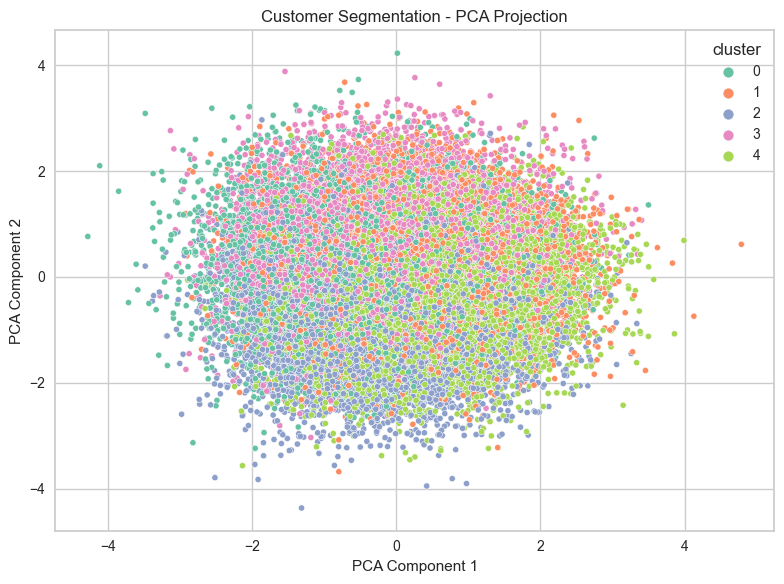

In [30]:
#PCA Cluster Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=20)
plt.title("Customer Segmentation - PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
#Cluster Profiling Summary
cluster_summary = df_encoded.groupby('cluster').agg({
    'age': 'mean',
    'active_policies': 'mean',
    'total_premium_paid': 'mean',
    'claim_frequency': 'mean',
    'policy_upgrades': 'mean',
    'coverage_amount': 'mean'
}).round(2)

cluster_summary

,age,active_policies,total_premium_paid,claim_frequency,policy_upgrades,coverage_amount
cluster,,,,,,
0,46.16,3.99,24976.86,0.99,0.89,500474.33
1,46.38,1.86,25021.25,0.99,0.90,500624.14
2,46.01,1.87,24904.35,1.03,0.91,500288.63
3,45.80,1.69,24924.41,1.00,0.90,500637.24
4,45.93,1.17,25111.96,1.01,0.91,502465.28


In [33]:
df_encoded.groupby("cluster").mean().round(2)

,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type,PCA1,PCA2
cluster,,,,,,,,,,,,,
0,46.16,0.50,1.55,1.56,3.99,24976.86,0.99,0.89,2.11,500474.33,0.80,-0.47,0.24
1,46.38,0.49,1.62,0.00,1.86,25021.25,0.99,0.90,2.11,500624.14,1.22,0.25,0.26
2,46.01,0.50,0.05,1.28,1.87,24904.35,1.03,0.91,2.09,500288.63,1.20,-0.16,-0.63
3,45.80,0.49,1.63,1.62,1.69,24924.41,1.00,0.90,2.08,500637.24,2.45,-0.16,0.56
4,45.93,0.50,1.65,1.65,1.17,25111.96,1.01,0.91,2.10,502465.28,0.52,0.39,-0.24


In [34]:
cluster_labels = {
    0: "Young Professionals",
    1: "High-Value Clients",
    2: "Frequent Claimers",
    3: "Passive Buyers",
    4: "Engaged Mid-Income"
}
df_encoded["segment"] = df_encoded["cluster"].map(cluster_labels)

In [35]:
df_encoded.head()

,age,gender,location,income_level,active_policies,total_premium_paid,claim_frequency,policy_upgrades,occupation,coverage_amount,policy_type,cluster,PCA1,PCA2,segment
0,49,1,0,1,1,13610.00,1,2,3,537000.0,2,2,0.014230,-1.142875,Frequent Claimers
1,28,1,2,2,1,36205.58,1,0,2,933000.0,0,4,-0.167044,0.574926,Engaged Mid-Income
2,41,1,1,2,3,3268.89,1,0,3,467000.0,2,3,-2.559184,-0.905373,Passive Buyers
3,20,1,1,1,2,29083.67,0,0,1,142000.0,0,4,-0.589427,-1.017195,Engaged Mid-Income
4,47,1,2,2,1,34498.55,0,1,2,693000.0,1,4,0.717352,0.841624,Engaged Mid-Income
